In [148]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trtarg_isol_1_7_10.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trtarg_isol_1_7_10.xlsx']

In [184]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trdist_isol_2_7_10.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trdist_isol_2_7_10.xlsx']

In [164]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['trained'] = df_target['trained'].replace(['trtarg'], ['target'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['trained'] = df_target_shuff['trained'].replace(['trtarg'], ['target'])

In [185]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['trained'] = df_distractor['trained'].replace(['trdist'], ['dist'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['trained'] = df_distractor_shuff['trained'].replace(['trdist'], ['dist'])


In [165]:
df = df_target
df_shuff=df_target_shuff

df_time_target=[]

for cond in ['1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

In [186]:
df = df_distractor
df_shuff=df_distractor_shuff

df_time_distractor=[]

for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['dist']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

In [169]:
# presentation_period= 0.35 #stim presnetation time
# presentation_period_cue=  0.50 #presentation of attentional cue time
# pre_stim_period= 0.5 #time between cue and stim
# resp_time = 4  #time the response is active


# def tiemcourse_4_conditions(df_plot, title_plot):
#     ##
#     ###
#     ####   In the input dataframe you need the following columns:
#     ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
#     ## 
#     pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
#     ##
#     fig = plt.figure(figsize=(12,10))
#     for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
#         #features of the plot for the different conditions. Fixed values
#         if condition == '1_0.2':
#             delay1 = 0.2
#             delay2 = 11.8
#             cue=0
#             t_p = cue + presentation_period_cue + pre_stim_period 
#             d_p = t_p + presentation_period +delay1 
#             r_t = d_p + presentation_period + delay2
#             xlim = [1, 30]

#         elif condition == '1_7':
#             delay1 = 7
#             delay2 = 5
#             cue=0
#             t_p = cue + presentation_period_cue + pre_stim_period 
#             d_p = t_p + presentation_period +delay1 
#             r_t = d_p + presentation_period + delay2
#             xlim = [1, 30]

#         elif condition == '2_0.2':
#             delay1 = 0.2
#             delay2 = 12
#             cue=0
#             d_p = cue + presentation_period_cue + pre_stim_period 
#             t_p = d_p + presentation_period +delay1 
#             r_t = t_p + presentation_period + delay2   
#             xlim = [1, 30]

#         elif condition == '2_7':
#             delay1 = 7
#             delay2 = 12
#             cue=0
#             d_p = cue + presentation_period_cue + pre_stim_period 
#             t_p = d_p + presentation_period +delay1 
#             r_t = t_p + presentation_period + delay2
#             xlim = [1, 36]


#         start_hrf = 4 #start of the Hemodynamic response (4seconds)
#         sec_hdrf = 3 #time it can last

#         d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
#         t_p1 = (start_hrf +t_p) ## strat of target (time)
#         r_t1=  (start_hrf + r_t) ## start of response (time)
#         #
#         d_p2 = d_p1 + sec_hdrf # end of distractor (time)
#         t_p2 = t_p1 + sec_hdrf # end of target (time)
#         r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

#         y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
#         y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

#         #fig = plt.figure()
#         ax = fig.add_subplot(2,2, indx_c+1) 
        
#         data_cond = df_plot.loc[df_plot['condition']==condition ]
#         sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
#                      hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
#         plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
#         plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
#         plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
#         plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
#         #
#         TITLE_BR = condition 
#         plt.title(TITLE_BR) #condition title
#         plt.gca().spines['right'].set_visible(False) #no right axis
#         plt.gca().spines['top'].set_visible(False) #no  top axis
#         plt.gca().get_xaxis().tick_bottom()
#         plt.gca().get_yaxis().tick_left()
#         plt.xticks([5,15,25]) #just this tcks
#         plt.ylim(-20, 20)
#         plt.yticks([-20, -10, 0 , 10, 20])
#         plt.xlim(xlim)
#         plt.ylabel('decoding')
#         if indx_c==3: #legend in just this condition (to avoid repetitions)       
#             plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
#             plt.xticks([10, 20 ,30])

#         else:
#             plt.gca().legend(loc= 1, frameon=False).remove()



#     ##
#     plt.suptitle( title_plot, fontsize=18) ## main title
#     plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
#     plt.show(block=False) #show
    


In [174]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


def tiemcourse_4_conditions(df_plot, title_plot, decoding_thing='target'):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(12,10))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            condition_title = 'o:1, d:0.2'
            y_label_cond = 'decoding ' + decoding_thing + ' (std)'
            x_label_cond = ''
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            condition_title = 'o:1, d:7'
            y_label_cond = '' 
            x_label_cond = ''
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            condition_title = 'o:2, d:0.2'
            y_label_cond = 'decoding ' + decoding_thing + ' (std)'
            x_label_cond = 'time (s)'        
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            condition_title = 'o:2, d:7'
            y_label_cond = '' 
            x_label_cond = 'time (s)' 
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
        #
        TITLE_BR = condition_title 
        plt.title(TITLE_BR, fontsize=20) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,10,15,20,25,30,35], fontsize=15) #just this tcks
        plt.ylim(-20, 20)
        plt.yticks([-20, -10, 0 , 10, 20], fontsize=15)
        plt.xlim(xlim)
        plt.xlabel(x_label_cond, fontsize=20)
        plt.ylabel(y_label_cond, fontsize=20)
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
            plt.xticks([5,10, 15, 20, 25,30,35], fontsize=15)

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=25) ## main title
    plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


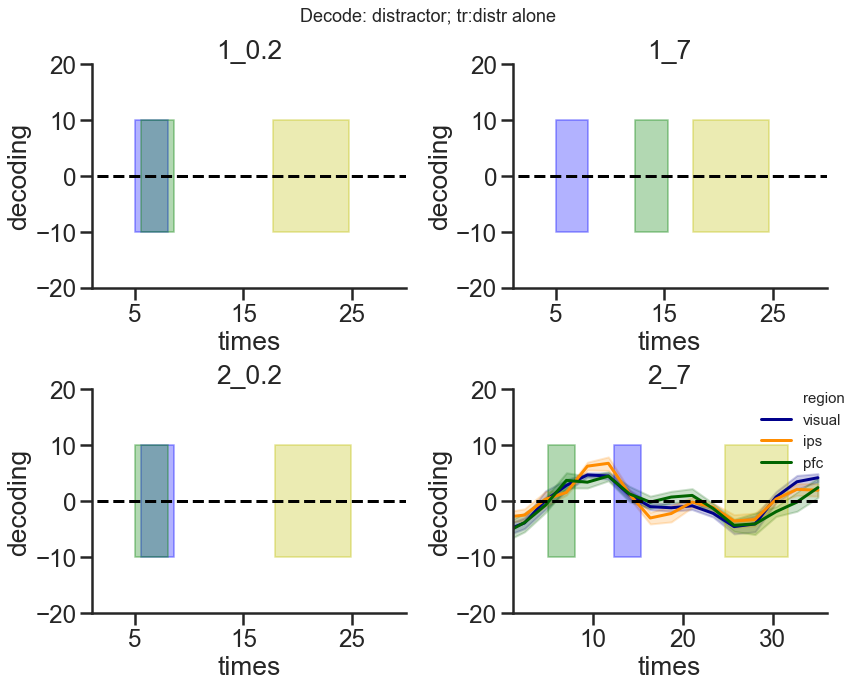

In [24]:
df_x = df_time_distractor
tiemcourse_4_conditions(df_x , 'Decode: distractor; tr:distr alone')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


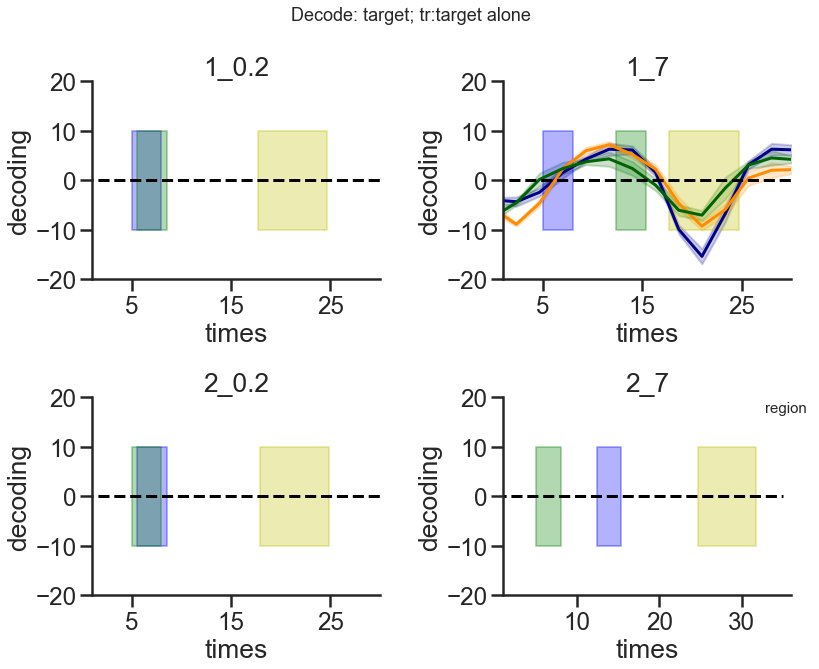

In [156]:
df_x = df_time_target
tiemcourse_4_conditions(df_x , 'Decode: target; tr:target alone')

In [ ]:
#### make the correct one for the target (get the data from the other conditions and change the 1_7)

In [159]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trtarg_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trtarg_isol.xlsx']

In [160]:
df_target_=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff_=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_.append(df_x)
    
#
df_target_=pd.concat(df_target_, axis=0)
df_target_['trained'] = df_target_['trained'].replace(['trtarg'], ['target'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff_.append(df_x)
    
#
df_target_shuff_=pd.concat(df_target_shuff_, axis=0)
df_target_shuff_['trained'] = df_target_shuff_['trained'].replace(['trtarg'], ['target'])

In [161]:
df_target_ = df_target_.loc[df_target_['condition']!='1_7']
df_target_shuff_ = df_target_shuff_.loc[df_target_shuff_['condition']!='1_7']

In [162]:
df = df_target_
df_shuff = df_target_shuff_

df_time_=[]

for cond in ['1_0.2', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time_.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time_target_ = pd.DataFrame(df_time_)
df_time_target_.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


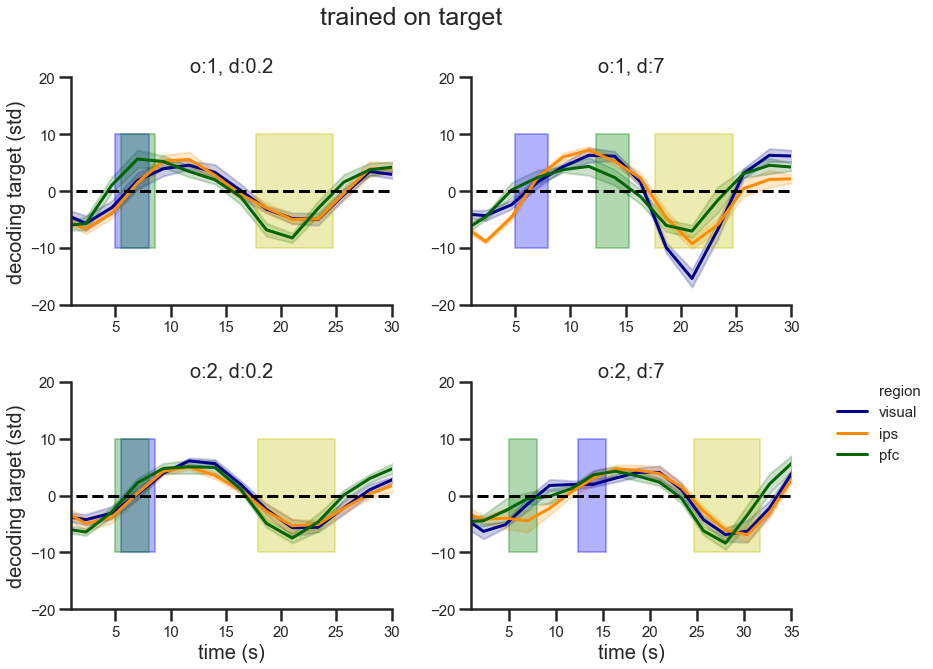

In [175]:
df_x = pd.concat([df_time_target, df_time_target_])
tiemcourse_4_conditions(df_x , 'trained on target')

In [ ]:
#### make the correct for the distractor

In [180]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trdist_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trdist_isol.xlsx']

In [181]:
df_distractor_=[]
df_distractor_shuff_=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_.append(df_x)
    
#
df_distractor_=pd.concat(df_distractor_, axis=0)
df_distractor_['trained'] = df_distractor_['trained'].replace(['trdist'], ['dist'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff_.append(df_x)
    
#
df_distractor_shuff_=pd.concat(df_distractor_shuff_, axis=0)
df_distractor_shuff_['trained'] = df_distractor_shuff_['trained'].replace(['trdist'], ['dist'])


In [182]:
df_distractor_ = df_distractor_.loc[df_distractor_['condition']!='2_7']
df_distractor_shuff_ = df_distractor_shuff_.loc[df_distractor_shuff_['condition']!='2_7']

In [183]:
df = df_distractor_
df_shuff = df_distractor_shuff_

df_time_=[]

for cond in ['1_0.2', '1_7', '2_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['dist']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time_.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time_distractor_ = pd.DataFrame(df_time_)
df_time_distractor_.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


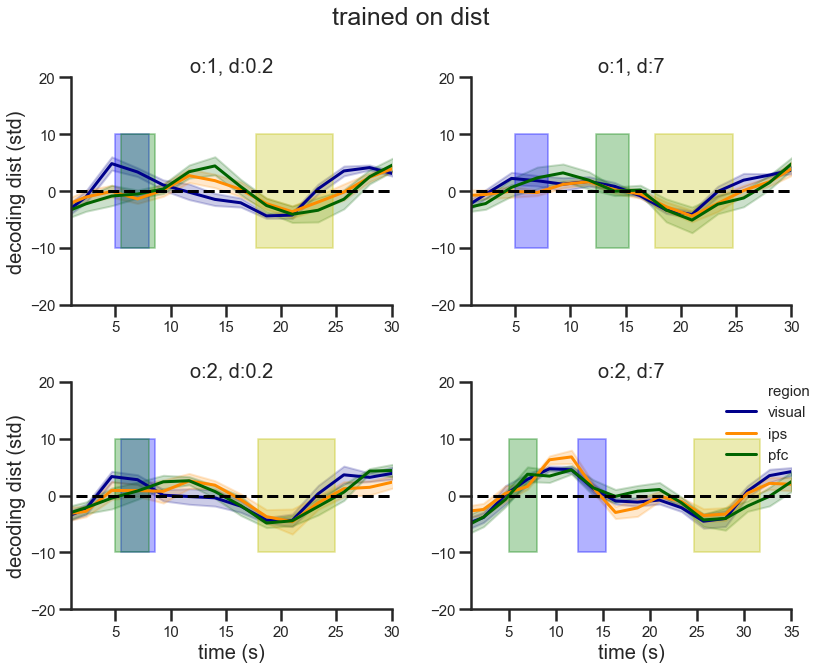

In [187]:
df_x = pd.concat([df_time_distractor, df_time_distractor_])
tiemcourse_4_conditions(df_x , 'trained on dist', decoding_thing='dist' )

In [ ]:
### 1_7 start end of delay, decoding target

In [9]:
df = df_target
df_shuff=df_target_shuff

df_delay=[]
for cond in [ '1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
             for item in ['targetA', 'targetB']: 
                    if item=='targetA':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 7.005) | (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']=='target')]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 7.005) | (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']=='target')]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )  
                    elif item=='targetB':
                        dfn = df.loc[(df['region']==reg) & 
                                 ((df['times']== 14.01) | (df['times']== 16.345)  ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']=='target')]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ((df_shuff['times']== 14.01) | (df_shuff['times']== 16.345)  ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']=='target')]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,7.741349,22.691223,visual,d001,1_7,signal,targetA,delay target alone
1,delay1,2.670885,9.325832,visual,d001,1_7,signal,targetB,delay target alone
2,delay1,1.185125,1.838258,visual,s001,1_7,signal,targetA,delay target alone
3,delay1,2.084655,6.937881,visual,s001,1_7,signal,targetB,delay target alone
4,delay1,3.798055,6.669985,visual,l001,1_7,signal,targetA,delay target alone


Text(0.5,1,'o1 d7, targetA vs target B')

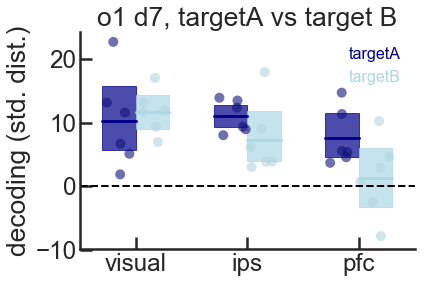

In [11]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['targetA', 'targetB'],
            df=df_delay, 
            palette=['darkblue', 'lightblue'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-5,20)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7, targetA vs target B')

In [ ]:
## 1_7 first delay decode target trained in target (CV) and in distractor

In [121]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trdist_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trdist_isol.xlsx']

In [122]:
df_target_=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff_=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_.append(df_x)
    
#
df_target_=pd.concat(df_target_, axis=0)
df_target_['trained'] = df_target_['trained'].replace(['trdist'], ['dist'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff_.append(df_x)
    
#
df_target_shuff_=pd.concat(df_target_shuff_, axis=0)
df_target_shuff_['trained'] = df_target_shuff_['trained'].replace(['trdist'], ['dist'])

In [123]:
df_target_ = pd.concat([df_target_, df_target])
df_target_shuff_ = pd.concat([df_target_shuff_, df_target_shuff])

In [128]:
df = df_target_
df_shuff = df_target_shuff_

df_delay=[]
for cond in ['1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 9.34) | (df['times']== 11.675)  ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='target') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         (  (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],  'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,8.080543,27.026263,visual,d001,1_7,signal,target,target
1,delay,3.110836,5.156397,visual,d001,1_7,signal,target,dist
2,delay,3.105204,7.556087,visual,s001,1_7,signal,target,target
3,delay,0.812891,1.331716,visual,s001,1_7,signal,target,dist
4,delay,5.566564,13.554005,visual,l001,1_7,signal,target,target


Text(0.5,1,'1st delay 1_7')

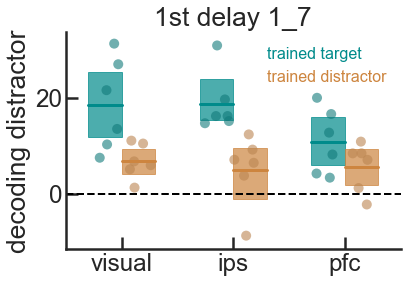

In [129]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
# plt.gca().set_ylim(-10,15)
# plt.gca().set_yticks([-10,-5,0,5,10,15])
plt.title('1st delay 1_7')

In [127]:
df.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [12]:
##decode target second delay (CV) with decode distractor (trained on target, NO CV)

In [13]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trtarg_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trtarg_isol.xlsx']

In [14]:
df_distractor_=[]
df_distractor_shuff_=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_.append(df_x)
    
#
df_distractor_=pd.concat(df_distractor_, axis=0)
df_distractor_['trained'] = df_distractor_['trained'].replace(['trtarg'], ['target'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff_.append(df_x)
    
#
df_distractor_shuff_=pd.concat(df_distractor_shuff_, axis=0)
df_distractor_shuff_['trained'] = df_distractor_shuff_['trained'].replace(['trtarg'], ['target'])


In [17]:
df = pd.concat([df_target, df_distractor_])
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff_])

#14.01

df_delay=[]
for cond in [ '1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
             for item in ['target', 'dist']: 
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']== 16.345) | (df['times']== 14.01 ) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']== 16.345) | (df_shuff['times']== 14.01  ) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                    ###
                    df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )   
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,2.670885,9.325832,visual,d001,1_7,signal,target,delay target alone
1,delay1,1.928194,3.562464,visual,d001,1_7,signal,dist,delay target alone
2,delay1,2.084655,6.937881,visual,s001,1_7,signal,target,delay target alone
3,delay1,1.935774,3.706685,visual,s001,1_7,signal,dist,delay target alone
4,delay1,5.193862,13.144589,visual,l001,1_7,signal,target,delay target alone


Text(0.5,1,'o1 d7, second delay')

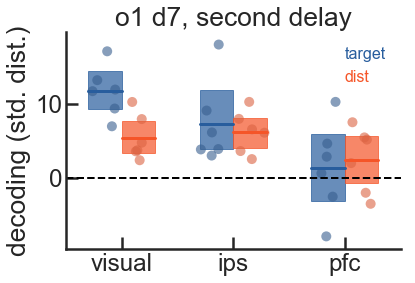

In [20]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-30,15)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7, second delay')

In [21]:
### second delay 1_7 with second delay 2_7 compare decoding target
#### (df['times']>= 16.345) & (df['times']<= 23.35)

In [22]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trtarg_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trtarg_isol.xlsx']

In [23]:
df_target_=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff_=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_.append(df_x)
    
#
df_target_=pd.concat(df_target_, axis=0)
df_target_['trained'] = df_target_['trained'].replace(['trtarg'], ['target'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff_.append(df_x)
    
#
df_target_shuff_=pd.concat(df_target_shuff_, axis=0)
df_target_shuff_['trained'] = df_target_shuff_['trained'].replace(['trtarg'], ['target'])

In [25]:
df_target_=df_target_.loc[df_target_['condition']!='1_7']
df_target_shuff_=df_target_shuff_.loc[df_target_shuff_['condition']!='1_7']

In [ ]:
df_target_ = pd.concat([df_target_, df_target])
df_target_shuff_ = pd.concat([df_target_shuff_, df_target_shuff])

In [33]:
df = df_target_
df_shuff = df_target_shuff_

df_delay=[]

for cond in [ '1_7', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            if cond=='1_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 14.01  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='target')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 14.01 ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )  
            elif cond=='2_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 18.68  ) | (df['times']== 14.01  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='target')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) | (df_shuff['times']== 14.01  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )  

  
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()


,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,2.670885,9.325832,visual,d001,1_7,signal,dist,delay target alone
1,delay1,2.084655,6.937881,visual,s001,1_7,signal,dist,delay target alone
2,delay1,5.193862,13.144589,visual,l001,1_7,signal,dist,delay target alone
3,delay1,6.345623,17.027641,visual,n001,1_7,signal,dist,delay target alone
4,delay1,5.295233,11.881072,visual,b001,1_7,signal,dist,delay target alone


Text(0.5,1,'o1 d7 vs o2 d7')

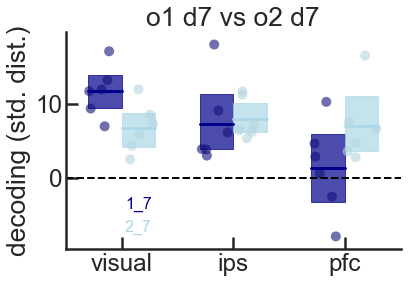

In [35]:
linares_plot(x='region', y='decoding_sh', hue='condition', order=['visual', 'ips', 'pfc'], hue_order=['1_7', '2_7'],
            df=df_delay, 
            palette=['darkblue', 'lightblue'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-30,30)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7 vs o2 d7')

In [ ]:
########################## condition 2_7 decoding distractor trained on target or on distractor

In [54]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trtarg_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trtarg_isol.xlsx']

In [55]:
df_distractor_=[]
df_distractor_shuff_=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_.append(df_x)
    
#
df_distractor_=pd.concat(df_distractor_, axis=0)
df_distractor_['trained'] = df_distractor_['trained'].replace(['trtarg'], ['target'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff_.append(df_x)
    
#
df_distractor_shuff_=pd.concat(df_distractor_shuff_, axis=0)
df_distractor_shuff_['trained'] = df_distractor_shuff_['trained'].replace(['trtarg'], ['target'])


In [56]:
df_distractor_ = pd.concat([df_distractor_, df_distractor])
df_distractor_shuff_ = pd.concat([df_distractor_shuff_, df_distractor_shuff])

In [51]:
# df = df_distractor_
# df_shuff = df_distractor_shuff_

# df['trained_in'] = df['trained'].copy()
# df['trained_in'] = df['trained_in'].replace([ 'delay target alone',  'delay dist alone'], ['tr: target alone', 'tr: distractor alone'])

In [72]:
df.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [78]:
df = df_distractor_
df_shuff = df_distractor_shuff_

df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         (  (df['times']== 16.345) | (df['times']== 18.68  ) | (df['times']== 14.01  )
                         | (df['times']== 21.015  )  ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='dist') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         (  (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) | (df_shuff['times']== 14.01  )
                         | (df_shuff['times']== 21.015  )  ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],  'dist', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,-1.880151,-3.157394,visual,d001,2_7,signal,dist,target
1,delay,-2.058942,-4.314662,visual,d001,2_7,signal,dist,dist
2,delay,3.254478,4.330054,visual,s001,2_7,signal,dist,target
3,delay,0.152630,0.465628,visual,s001,2_7,signal,dist,dist
4,delay,3.963106,8.319175,visual,l001,2_7,signal,dist,target


Text(0.5,1,'2nd delay 2_7')

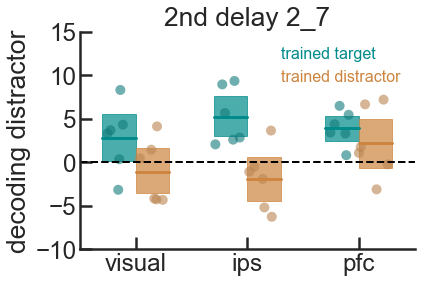

In [81]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
plt.gca().set_ylim(-10,15)
plt.gca().set_yticks([-10,-5,0,5,10,15])
plt.title('2nd delay 2_7')

In [82]:
df = df_distractor_
df_shuff = df_distractor_shuff_

df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         (  (df['times']== 9.34) | (df['times']== 11.675) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='dist') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],  'dist', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,4.517295,5.336880,visual,d001,2_7,signal,dist,target
1,delay,3.980518,11.523941,visual,d001,2_7,signal,dist,dist
2,delay,-0.255546,-0.755193,visual,s001,2_7,signal,dist,target
3,delay,6.403869,15.046182,visual,s001,2_7,signal,dist,dist
4,delay,4.870800,8.435251,visual,l001,2_7,signal,dist,target


Text(0.5,1,'1st delay 2_7')

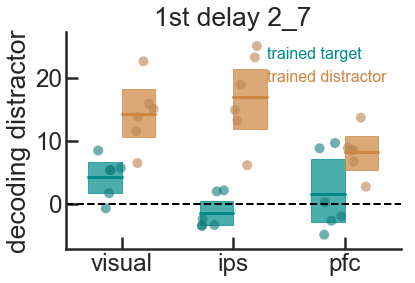

In [84]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
#plt.gca().set_ylim(-10,15)
#plt.gca().set_yticks([-10,-5,0,5,10,15])
plt.title('1st delay 2_7')